# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

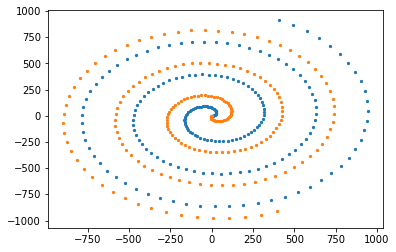

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = pd.concat([df1,df2])
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, classification_report
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

In [6]:
X = df.drop(columns = "CLASS")
Y = df["CLASS"]

## Feature Engineering

In [7]:
XNew = X
# XNew["X2"] = X["X"]**2
# XNew["Y2"] = X["Y"]**2
# XNew["XY"] = X["X"]*X["Y"]
XNew["SinX"] = np.sin(X["X"])
XNew["SinY"] = np.sin(X["Y"])
# XNew["Theta"] = np.arctan(X["X"], X["Y"])
# XNew["R"] = np.sqrt((X["X"]**2), (X["Y"]**2))

In [8]:
XNew

,X,Y,SinX,SinY
0,0.000000,0.000000,0.000000,0.000000
1,4.975021,0.499167,-0.965710,0.478694
2,9.800666,1.986693,-0.367099,0.914754
3,14.330047,4.432803,0.981456,-0.961170
4,18.421220,7.788367,-0.415358,0.997848
...,...,...,...,...
195,8.644721,-974.961676,0.703320,-0.876216
196,106.478547,-974.198296,-0.329339,-0.299886
197,204.240898,-963.592578,-0.037367,-0.768419
198,300.939178,-943.151955,-0.608141,-0.624241


In [9]:
XTrain, XTest, YTrain, YTest = train_test_split(XNew, Y, test_size = 0.5, random_state = 22)

In [10]:
# Scaler = MinMaxScaler()

# XTrainScaled = Scaler.fit_transform(XTrain)
# XTrainScaled = pd.DataFrame(XTrainScaled, columns = XTrain.columns, index = XTrain.index)

# XTestScaled = Scaler.transform(XTest)
# XTestScaled = pd.DataFrame(XTestScaled, columns = XTest.columns, index = XTest.index)

## Model

In [11]:
# activity_regularizer = regularizers.l1(0.003)

In [12]:
Model = keras.Sequential()
Model.add(Dense(units = 5,
                input_dim = XTrain.shape[1],
                activation = "tanh",
                activity_regularizer = regularizers.l1(0.001)))
Model.add(Dense(units = 2, activation = "tanh"))
Opt = keras.optimizers.Adam(learning_rate=0.03)
Model.compile(optimizer = Opt,
              loss = "binary_crossentropy",
              metrics = "accuracy")
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [13]:
EarlyStop = EarlyStopping(patience=20)

CheckpointPath = 'SpiralBCNN.hdf5'
Checkpoint = ModelCheckpoint(
    filepath=CheckpointPath,
    save_freq='epoch',
    save_weights_only=False,
    verbose=0
)

In [14]:
History = Model.fit(
    XTrain, 
    YTrain, 
    epochs=200, 
    validation_split=0.20, 
    batch_size=10,
    verbose=1,
    callbacks=[EarlyStop, Checkpoint]
)

Epoch 1/200
16/16 [==============================] - 1s 18ms/step - loss: 5.0408 - accuracy: 0.5312 - val_loss: 3.3520 - val_accuracy: 0.4000
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 4.6882 - accuracy: 0.4938 - val_loss: 3.2882 - val_accuracy: 0.5250
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 4.6747 - accuracy: 0.4563 - val_loss: 3.1241 - val_accuracy: 0.5500
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 4.4713 - accuracy: 0.5000 - val_loss: 3.1080 - val_accuracy: 0.5500
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 4.4301 - accuracy: 0.4250 - val_loss: 3.1159 - val_accuracy: 0.5500
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 4.4137 - accuracy: 0.4750 - val_loss: 3.1161 - val_accuracy: 0.4750
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 4.3607 - accuracy: 0.4875 - val_loss: 3.6302 - val_accuracy: 0.5500
Epoch 8/200


Well, after many, many, MANY trys, the best I could do is a loss under 0 and 50% accuracy, which seems underwhelming.